# Import library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Import Dataframes and concat

In [2]:
bmw = pd.read_csv("bmw.csv")
bmw["type"] = "bmw"

hyundi = pd.read_csv("hyundi.csv")
hyundi["type"] = "hyundi"
hyundi.rename(columns = {"tax(£)": "tax"}, inplace = True)

audi = pd.read_csv("audi.csv")
audi["type"] = "audi"

ford = pd.read_csv("ford.csv")
ford["type"] = "ford"


toyota = pd.read_csv("toyota.csv")
toyota["type"] = "toyota"

vw = pd.read_csv("vw.csv")
vw["type"] = "vw"

merc = pd.read_csv("merc.csv")
merc["type"] = "merc"


skoda = pd.read_csv("skoda.csv")
skoda["type"] = "skoda"


df = pd.concat([bmw, audi, ford, hyundi, toyota, vw, merc, skoda], axis=0)

In [30]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmw
14,X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0,bmw
15,3 Series,2017,16500,Manual,16570,Diesel,125,58.9,2.0,bmw
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0,bmw


# Dropping ouliers and EDA first run

In [4]:
drop_lst = df.loc[df["mileage"] > 200000].index

In [5]:
df.drop(drop_lst, inplace = True)


In [6]:
drop_lst2 = df.loc[df["mileage"] < 1000].index


In [7]:
df.drop(index = drop_lst2, inplace = True)


In [8]:
drop_price = df.loc[df["price"] > 120000].index

In [9]:
df.drop(drop_price, inplace = True)


In [10]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmw
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmw
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmw
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmw
...,...,...,...,...,...,...,...,...,...,...
6257,Yeti,2016,12490,Semi-Auto,31691,Petrol,125,51.4,1.2,skoda
6261,Octavia,2018,12480,Manual,30805,Petrol,145,57.7,1.5,skoda
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2,skoda
6265,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0,skoda


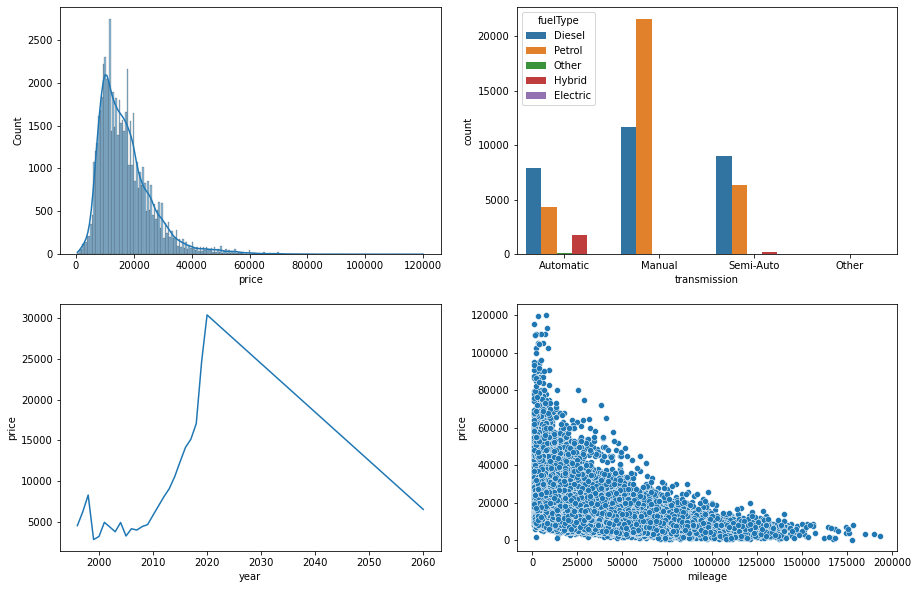

In [11]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(df.price, kde=True, ax=ax[0,0])
sns.countplot(x='transmission', data=df, hue='fuelType', ax=ax[0,1])
sns.lineplot(x='year', y='price', data=df[df.year > 1995], ci=None, ax=ax[1,0])
sns.scatterplot(x='mileage', y='price', data=df, ax=ax[1,1]);


# Dropping outliers and EDA secound run

df = 63009 rows

df.loc[df.price > 38000] = 2244 rows

df.loc[df.mileage > 73000] = 2411 rows

df.loc[df.year < 2015].index = tog bort 2 superoutliers en som var byggd 1960 och en som var bygg 2060

df.loc[df.engineSize > 3] = 96 rows 40k plus som är mindre än 3

df = 41602 rows





### Box plot viz from specifik columns

<AxesSubplot:xlabel='engineSize'>

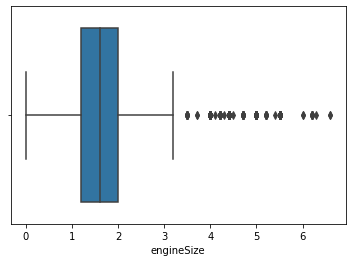

In [12]:
sns.boxplot(df.engineSize)

In [13]:
df.loc[df.year < 1980].index

Int64Index([12072], dtype='int64')

In [14]:
df.loc[df.year > 2020].index

Int64Index([17726], dtype='int64')

In [15]:
df.drop(index = 17726, inplace = True)

In [16]:
df.drop(index = 12072, inplace = True)

<AxesSubplot:xlabel='year'>

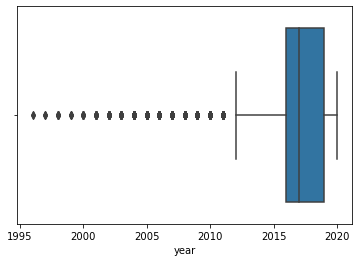

In [17]:
sns.boxplot(df.year)

<AxesSubplot:xlabel='mileage'>

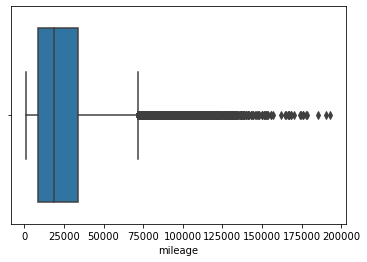

In [18]:
sns.boxplot(df.mileage)

<AxesSubplot:xlabel='price'>

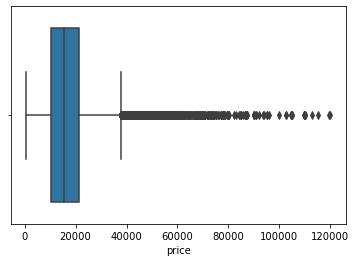

In [19]:
sns.boxplot(df.price)

### Code for dropping ouliers in specifik columns

In [21]:
drop_box_engineSize = df.loc[df.engineSize > 3].index
df.drop(drop_box_engineSize, inplace = True)

In [24]:
drop_box_price = df.loc[df.price > 38000].index
df.drop(drop_box_price, inplace = True)


In [26]:
drop_box_mileage = df.loc[df.mileage > 73000].index
df.drop(drop_box_mileage, inplace = True)

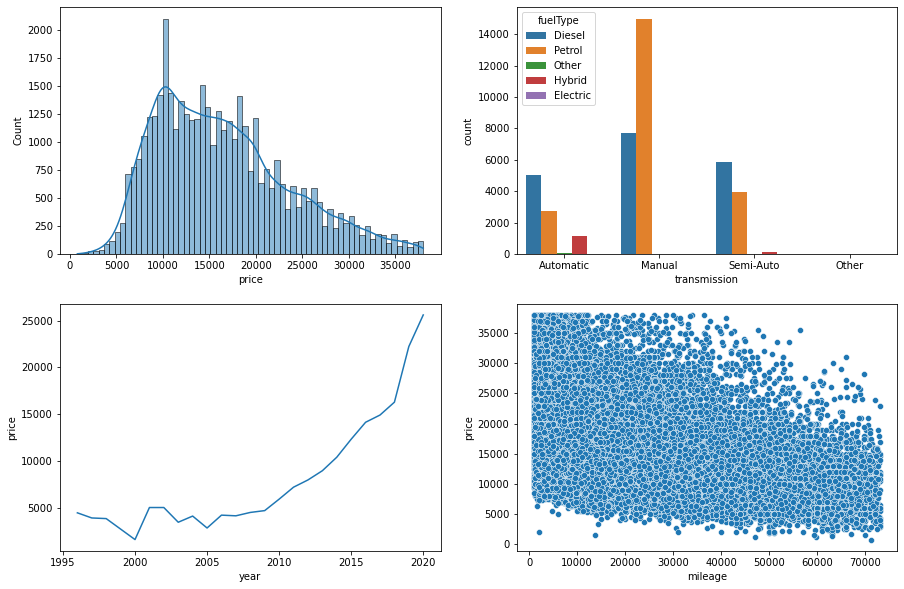

In [28]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(df.price, kde=True, ax=ax[0,0])
sns.countplot(x='transmission', data=df, hue='fuelType', ax=ax[0,1])
sns.lineplot(x='year', y='price', data=df[df.year > 1995], ci=None, ax=ax[1,0])
sns.scatterplot(x='mileage', y='price', data=df, ax=ax[1,1]);

In [29]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,type
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmw
14,X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0,bmw
15,3 Series,2017,16500,Manual,16570,Diesel,125,58.9,2.0,bmw
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0,bmw
...,...,...,...,...,...,...,...,...,...,...
6247,Superb,2019,13980,Manual,42700,Diesel,145,65.7,2.0,skoda
6248,Superb,2019,13980,Automatic,51900,Diesel,145,62.8,2.0,skoda
6249,Superb,2019,13980,Automatic,49900,Diesel,145,62.8,2.0,skoda
6252,Fabia,2017,9620,Semi-Auto,24100,Petrol,20,60.1,1.2,skoda


## X & y and train test split

In [32]:
target_var = "price"
X = df.drop(columns = target_var, axis = 1 )

y = df[target_var]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Pipeline for Preprocessing the data


In [33]:
from sklearn.pipeline import make_pipeline

## Sklearn for preprocessing the data


In [34]:
#impute missing values (NaNs)
from sklearn.impute import SimpleImputer

# scaling 
from sklearn.preprocessing import StandardScaler

# onehotencoder, creates dummies (compare to pd.get_dummies)
from sklearn.preprocessing import OneHotEncoder

## preprocessing for categorical columns

In [35]:
cat_trans = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"),
             OneHotEncoder(handle_unknown = "ignore"))

## Preprocessing for numerical columns

In [36]:
num_trans = make_pipeline(SimpleImputer(strategy = "median"),
             StandardScaler())

In [37]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

## Make column transformer

In [38]:
from sklearn.compose import make_column_transformer

In [39]:
preprocessor = make_column_transformer(
(num_trans, num_cols),
(cat_trans, cat_cols))

In [40]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['model', 'transmission', 'fuelType', 'type'], dtype='object'))])

In [41]:
X_train = preprocessor.transform(X_train)

## Model selection

In [42]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import RandomForestRegressor


from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

In [43]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
]

from sklearn.model_selection import cross_val_score

for i in regressors:
    cv_result = cross_val_score(i, X_train, y_train, cv = 5)
    
    print(i, cv_result)
    print(i, cv_result.mean())
    print("")

LinearRegression() [0.88811916 0.88435939 0.88247079 0.88246337 0.88372353]
LinearRegression() 0.8842272492742129

DecisionTreeRegressor() [0.91009099 0.91486195 0.90798326 0.91400526 0.91323818]
DecisionTreeRegressor() 0.9120359290290733

RandomForestRegressor() [0.94597244 0.94722493 0.9453486  0.9476454  0.94744834]
RandomForestRegressor() 0.946727942381208

KNeighborsRegressor() [0.93431409 0.93773055 0.93530422 0.93460093 0.93696549]
KNeighborsRegressor() 0.935783055312284



# RandomForestRegressor gridsearch with hyperparameter

In [54]:
from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(RandomForestRegressor(max_depth=10, random_state=10,n_estimators = 100), param_grid = {}, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=10, random_state=10),
             param_grid={})

In [55]:
grid.best_score_

0.9100426015930223

In [56]:
best_model = grid.best_estimator_

In [57]:
preprocessor.transform(X_test)

<12481x169 sparse matrix of type '<class 'numpy.float64'>'
	with 112320 stored elements in Compressed Sparse Row format>

In [58]:
best_model.predict(preprocessor.transform(X_test))

array([14890.7544127 , 13865.03068758, 12018.78092384, ...,
       14140.55785591, 21968.76129355,  6195.90177962])

In [59]:
best_model.score(preprocessor.transform(X_test), y_test)

0.91058212300758

In [61]:
import os 
os.getcwd()

'/Users/filiplundkvist/BC2_2021/Vecka 9 Nod/Labbar vecka 9'